<b> Problem Explained </b>

The main goal of this task is to analyze Electronidex’ transactions and to find patterns on those transactions. I want to understand what their customer behavior is and to find out possible relationships between the products that are bought. Understanding this can open the store for bundle oportunites and promotions. 
To do this I am using the Apriori Algorithm to find out which are those associations.

The data used is on file, ElectronidexTransactions.csv, is a record of one month’s (30 days’ worth) of 9835 online transactions and which items were purchased out of the 125 products Electronidex sells.

In [2]:
#Install the libraries necessary
library(arules)
library(arulesViz)

In [ ]:
elec_transactions <- read.transactions(file = "C:/Users/Francisco Cardoso/Documents/UT Data Analytics/Github/Task 4/ElectronidexTransactions2017.csv", format = "basket", sep=",", rm.duplicates = TRUE) 

<b> Data Exploration </b>

In [15]:
#Number of transactions
length (elec_transactions)

[1] 9835

In [23]:
#Check Items labels
itemLabels(elec_transactions)

[1] "1TB Portable External Hard Drive"                     
  [2] "2TB Portable External Hard Drive"                     
  [3] "3-Button Mouse"                                       
  [4] "3TB Portable External Hard Drive"                     
  [5] "5TB Desktop Hard Drive"                               
  [6] "Acer Aspire"                                          
  [7] "Acer Desktop"                                         
  [8] "Acer Monitor"                                         
  [9] "Ailihen Stereo Headphones"                            
 [10] "Alienware Laptop"                                     
 [11] "AOC Monitor"                                          
 [12] "APIE Bluetooth Headphone"                             
 [13] "Apple Earpods"                                        
 [14] "Apple MacBook Air"                                    
 [15] "Apple MacBook Pro"                                    
 [16] "Apple Magic Keyboard"                                 
 [17] "Apple TV"                                             
 [18] "Apple Wired Keyboard"                                 
 [19] "Apple Wireless Keyboard"                              
 [20] "ASUS 2 Monitor"                                       
 [21] "ASUS Chromebook"                                      
 [22] "ASUS Desktop"                                         
 [23] "ASUS Monitor"                                         
 [24] "Audio Cable"                                          
 [25] "Backlit LED Gaming Keyboard"                          
 [26] "Belkin Mouse Pad"                                     
 [27] "Bose Companion Speakers"                              
 [28] "Brother Printer"                                      
 [29] "Brother Printer Toner"                                
 [30] "Cambridge Bluetooth Speaker"                          
 [31] "Canon Ink"                                            
 [32] "Canon Office Printer"                                 
 [33] "Computer Game"                                        
 [34] "Cyber Acoustics"                                      
 [35] "CYBERPOWER Gamer Desktop"                             
 [36] "Dell 2 Desktop"                                       
 [37] "Dell Desktop"                                         
 [38] "Dell KM117 Wireless Keyboard & Mouse"                 
 [39] "Dell Laptop"                                          
 [40] "Dell Monitor"                                         
 [41] "Dell Wired Keyboard"                                  
 [42] "DOSS Touch Wireless Bluetooth"                        
 [43] "DYMO Label Manker"                                    
 [44] "DYMO Labeling Tape"                                   
 [45] "EagleTec Wireless Combo Keyboard and Mouse"           
 [46] "Eluktronics Pro Gaming Laptop"                        
 [47] "Epson Black Ink"                                      
 [48] "Epson Printer"                                        
 [49] "Etekcity Power Extension Cord Cable"                  
 [50] "Ethernet Cable"                                       
 [51] "Fire HD Tablet"                                       
 [52] "Fire TV Stick"                                        
 [53] "Full Motion Monitor Mount"                            
 [54] "Gaming Mouse Professional"                            
 [55] "Generic Black 3-Button"                               
 [56] "Google Home"                                          
 [57] "Halter Acrylic Monitor Stand"                         
 [58] "Halter Mesh Metal Monitor Stand"                      
 [59] "HDMI Adapter"                                         
 [60] "HDMI Cable 6ft"                                       
 [61] "Height-Adjustable Standing Desk"                      
 [62] "HP Black & Tri-color Ink"                             
 [63] "HP Desktop"                                           
 [64] "HP Laptop"                                            
 [65] "HP Monitor"                

In [24]:
#Detailed information about the transactions
summary(elec_transactions)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 125 columns (items) and a density of 0.03506172 

most frequent items:
                    iMac                HP Laptop CYBERPOWER Gamer Desktop 
                    2519                     1909                     1809 
           Apple Earpods        Apple MacBook Air                  (Other) 
                    1715                     1530                    33622 

element (itemset/transaction) length distribution:
sizes
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
   2 2163 1647 1294 1021  856  646  540  439  353  247  171  119   77   72   56 
  16   17   18   19   20   21   22   23   25   26   27   29   30 
  41   26   20   10   10   10    5    3    1    1    3    1    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   3.000   4.383   6.000  30.000 

includes extended item information - examples:
                            

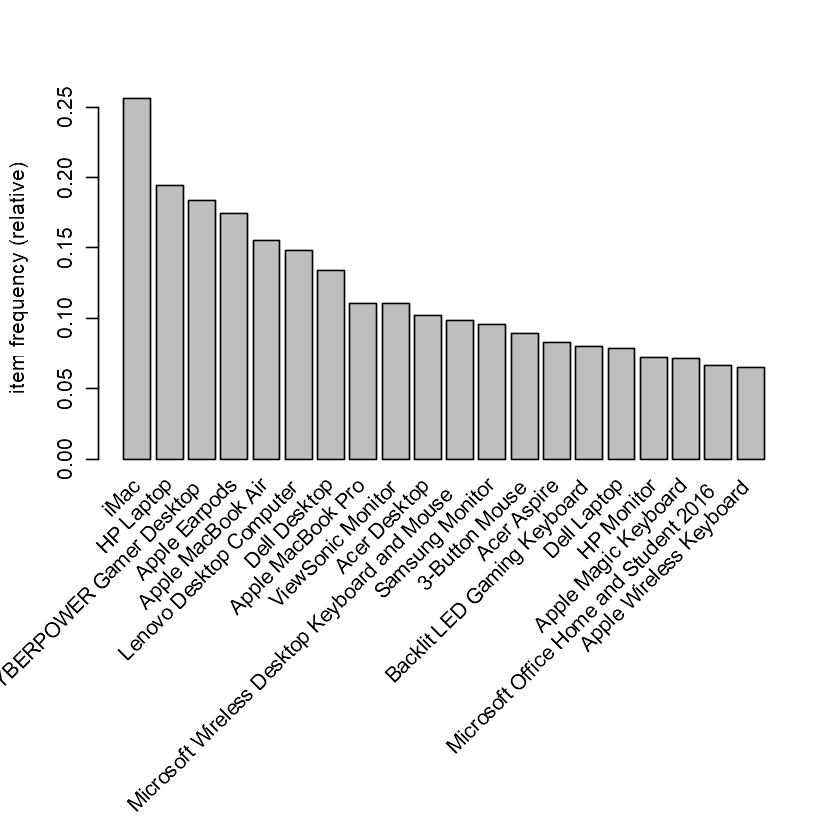

In [25]:
#Plotting the most product with the highest number of transactions
itemFrequencyPlot(elec_transactions, type = c("relative", "absolute"), 
                  weighted = FALSE, support = NULL, topN = 20,
                  population = NULL, popCol = "BLACK", popLwd = 1,
                  lift = FALSE, horiz = FALSE, 
                  names = TRUE, cex.names =  graphics::par("cex.axis"), 
                  xlab = NULL, ylab = NULL, mai = NULL)

We can better understand which are the products more times envolved on transactions. 

<b>Creating the rules</b>

I will use the Apriori Algorithm to create rules of associations. I have tuned Support, Confidence and Minimum Lenght to obtain the rules and achieve and optimum value of its lift, support  and confidence.  

In [41]:
rules<- apriori(elec_transactions, parameter = list(supp = 0.03, conf = 0.3, minlen = 2))
inspect(rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.3    0.1    1 none FALSE            TRUE       5    0.03      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 295 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[125 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [43 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [17 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                                         rhs                       
[1]  {Microsoft Office Home and Student 2016} => {iMac}                    
[2]  {Apple Magic Keyboard}                   => {iMac}                    
[3]  {3-Button Mouse}                         => {iMac}   

For better understanding let's analyze the rules

In [30]:
summary(rules)

set of 17 rules

rule length distribution (lhs + rhs):sizes
 2 
17 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

summary of quality measures:
    support          confidence          lift           count      
 Min.   :0.03071   Min.   :0.3064   Min.   :1.204   Min.   :302.0  
 1st Qu.:0.03122   1st Qu.:0.3231   1st Qu.:1.449   1st Qu.:307.0  
 Median :0.03640   Median :0.3710   Median :1.578   Median :358.0  
 Mean   :0.04268   Mean   :0.3717   Mean   :1.582   Mean   :419.8  
 3rd Qu.:0.04942   3rd Qu.:0.4074   3rd Qu.:1.749   3rd Qu.:486.0  
 Max.   :0.07555   Max.   :0.4664   Max.   :2.241   Max.   :743.0  

mining info:
              data ntransactions support confidence
 elec_transactions          9835    0.03        0.3

In [35]:
#Lets organize the first 10 rules and displaying it them descently by its level of confidence. 
rulesconfidence <- sort(rules, decreasing = TRUE, by = "confidence")
inspect(head(rulesconfidence, 10))

     lhs                                         rhs         support   
[1]  {Microsoft Office Home and Student 2016} => {iMac}      0.03101169
[2]  {Apple Magic Keyboard}                   => {iMac}      0.03233350
[3]  {ViewSonic Monitor}                      => {iMac}      0.04941535
[4]  {ViewSonic Monitor}                      => {HP Laptop} 0.04799187
[5]  {Dell Desktop}                           => {iMac}      0.05460092
[6]  {Lenovo Desktop Computer}                => {iMac}      0.05876970
[7]  {HP Laptop}                              => {iMac}      0.07554652
[8]  {3-Button Mouse}                         => {iMac}      0.03335028
[9]  {Acer Aspire}                            => {iMac}      0.03070666
[10] {Acer Desktop}                           => {iMac}      0.03640061
     confidence lift     count
[1]  0.4663609  1.820825 305  
[2]  0.4510638  1.761101 318  
[3]  0.4479263  1.748851 486  
[4]  0.4350230  2.241200 472  
[5]  0.4074355  1.590762 537  
[6]  0.3969780  1.5499

In [42]:
#And also ets organize the first 10 rules and displaying it them descently by its level of lift 
inspect(sort(rules, by = "lift")[1:10])

     lhs                                         rhs                       
[1]  {ViewSonic Monitor}                      => {HP Laptop}               
[2]  {Microsoft Office Home and Student 2016} => {iMac}                    
[3]  {Samsung Monitor}                        => {CYBERPOWER Gamer Desktop}
[4]  {Apple Magic Keyboard}                   => {iMac}                    
[5]  {ViewSonic Monitor}                      => {iMac}                    
[6]  {Dell Desktop}                           => {HP Laptop}               
[7]  {Lenovo Desktop Computer}                => {HP Laptop}               
[8]  {Dell Desktop}                           => {iMac}                    
[9]  {Acer Desktop}                           => {HP Laptop}               
[10] {Lenovo Desktop Computer}                => {iMac}                    
     support    confidence lift     count
[1]  0.04799187 0.4350230  2.241200 472  
[2]  0.03101169 0.4663609  1.820825 305  
[3]  0.03101169 0.3241233  1.762163 30

In [43]:
#Checking if there are reduntant rules
is.redundant(rules) 

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE

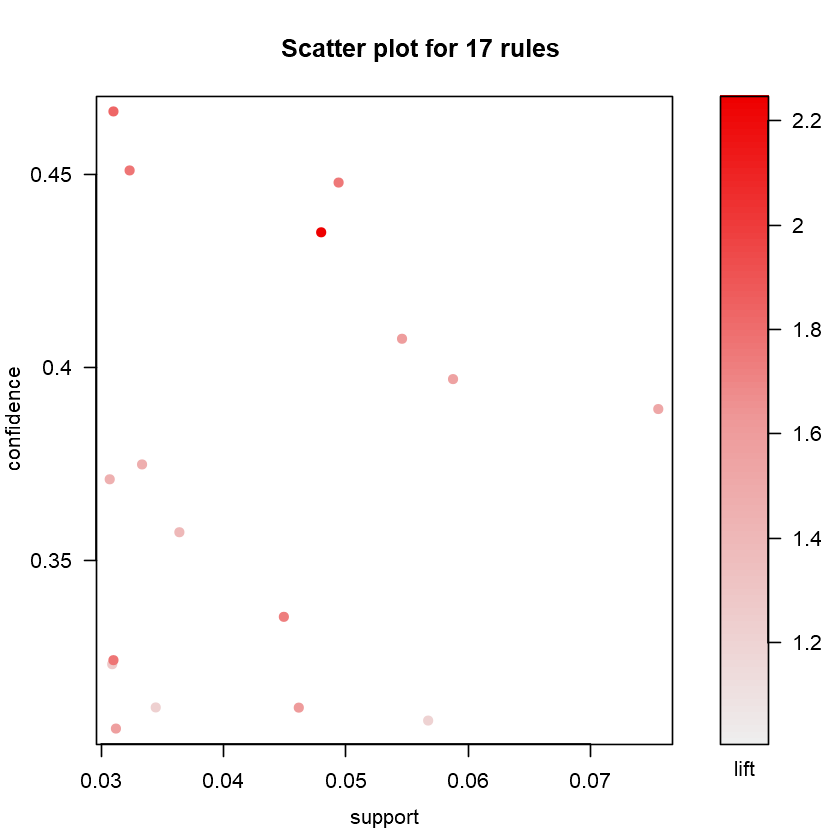

In [44]:
#We can also see how they're are distributed by creating a plot with confidence and support
plot(rules)

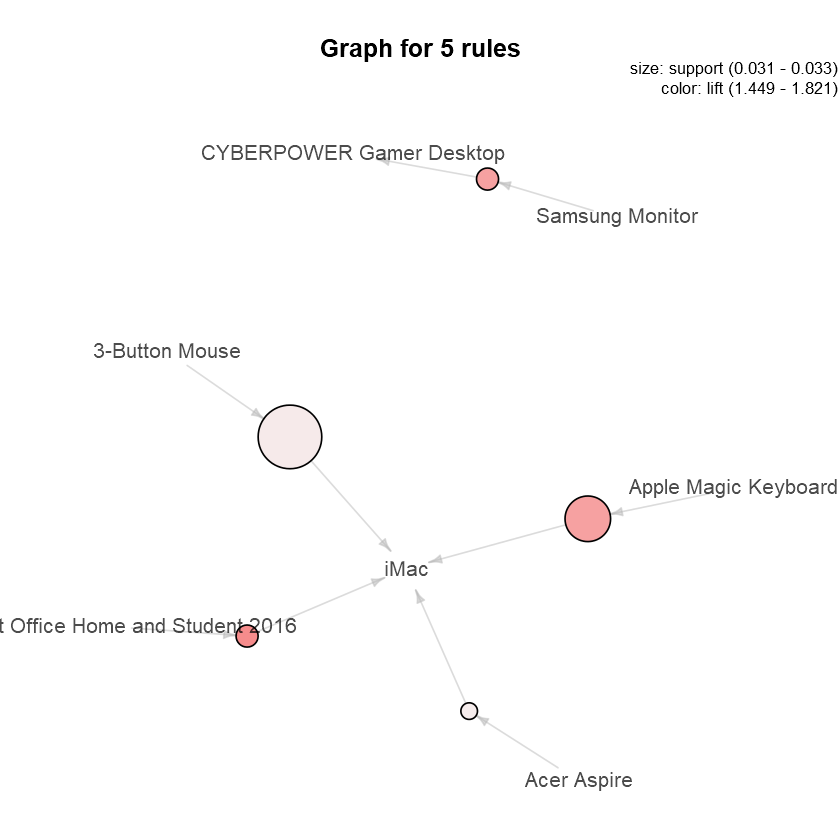

In [49]:
#However, with a plot we can cleary see how rules' associations 
plot(rules[1:5], method="graph")

We can clearly see two independent groups. On the one with the iMac on the we can highlight the two peripherals, Apple Magic Keyboard and 3 Button Mouse that are bought alongside with the iMac and also the Microsoft Office package. It is also interesting to see, that instead of an Apple Laptop, the consumers prefer to buy an Acer Aspire, possible due to its lowest price. 
On other the other segment, we see that gamers buy CYBERPOWER Gamer Desktop alongside with a Samsung Monitor. 
